In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [0]:
!cp -r /content/Drive/My\ Drive/CrowdControl/* /content/

In [0]:
data=loadtxt('/Users/francescobodria/gama_workspace/Crowd Control/Croud-Control/models/tempo_vs_kd_evapo.txt', delimiter=' ')

In [0]:
data.shape

(1200, 7)

In [0]:
data[-30:,0]

array([2000., 2000.,  486.,  495., 2000., 2000.,  480.,  543., 2000.,
       2000.,  513.,  537., 2000., 2000.,  477.,  477., 2000., 2000.,
        558., 2000., 2000., 2000.,  447.,  522., 2000., 2000.,  486.,
        543., 2000., 2000.])

# 100 Agenti

Text(0,0.5,'exit_cycle')

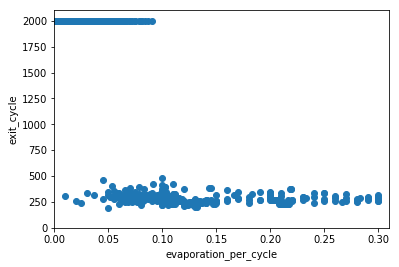

In [0]:
n = 100
data_100=data[data[:,2]==n]
plot(data_100[:,1],data_100[:,0],'o')
axis([0,0.31,0,2100])
xlabel('evaporation_per_cycle')
ylabel('exit_cycle')

In [0]:
prob=zeros([len(data_100[:,0])])
for i in range(len(data_100[:,0])):
    if data_100[i,0]==2000:
        prob[i]=1
    else:
        prob[i]=0

In [0]:
x=unique(data_100[:,1])
y=zeros([len(x)])
for i in range(len(x)):
    var = prob[data_100[:,1]==x[i]]
    y[i]=sum(var)/(len(var))
    x[i]=round(x[i],2)
x_1 = unique(x)
y_1 = zeros([len(x_1)])
for i in range(len(x_1)):
    y_1[i]=mean(y[x==x_1[i]])

[0, 0.3, -0.1, 1.1]

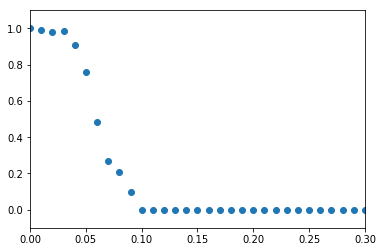

In [0]:
plot(x_1,y_1,'o')
axis([0,0.3,-0.1,1.1])

In [0]:
x=unique(data_100[:,1])
y=zeros([len(x)])
for i in range(len(x)):
    var = prob[data_100[:,1]==x[i]]
    y[i]=sum(var)/(len(var))
    x[i]=round(x[i],2)
x_1 = unique(x)
y_1 = zeros([len(x_1)])
for i in range(len(x_1)):
    y_1[i]=mean(y[x==x_1[i]])

In [0]:
d = zeros([len(data_100[:,1])])
for i in range(len(data_100[:,1])):
    d[i] = round(data_100[:,1][i],2)
x = unique(d)
t = zeros([len(x)])
for i in range(len(x)):
    t[i] = mean(data_100[:,0][d==x[i]])

[0.1, 1.1, 150, 500]

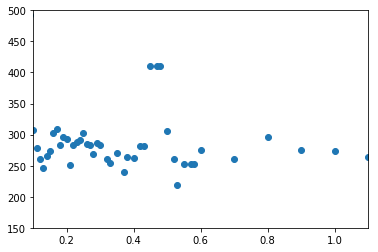

In [0]:
plot(x,t,'o')
axis([0.1,1.1,150,500])

In [0]:
mean(t[10:])

278.8043026758816

In [0]:
50*50-140

2360

# 1000 Agenti

Text(0,0.5,'exit_cycle')

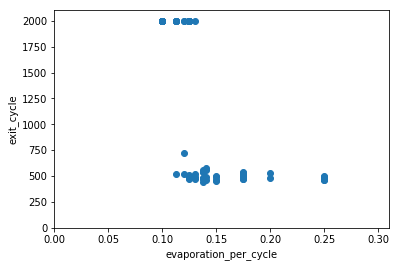

In [0]:
n = 1000
data_1000=data[data[:,2]==n]
plot(data_1000[:,1],data_1000[:,0],'o')
axis([0,0.31,0,2100])
xlabel('evaporation_per_cycle')
ylabel('exit_cycle')

[0, 0.3, -0.1, 1.1]

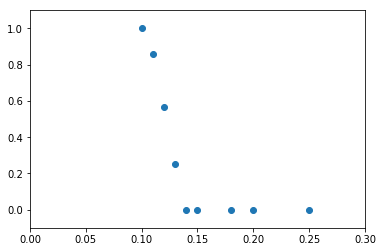

In [0]:
prob=zeros([len(data_1000[:,0])])
for i in range(len(data_1000[:,0])):
    if data_1000[i,0]==2000:
        prob[i]=1
    else:
        prob[i]=0

x=unique(data_1000[:,1])
y=zeros([len(x)])
for i in range(len(x)):
    var = prob[data_1000[:,1]==x[i]]
    y[i]=sum(var)/(len(var))
    x[i]=round(x[i],2)
x_1 = unique(x)
y_1 = zeros([len(x_1)])
for i in range(len(x_1)):
    y_1[i]=mean(y[x==x_1[i]])
    
plot(x_1,y_1,'o')
axis([0,0.3,-0.1,1.1])

In [0]:
x_1

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.18, 0.2 , 0.25, 0.4 , 0.7 ])

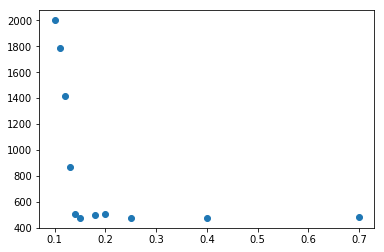

In [0]:
d = zeros([len(data_1000[:,1])])
for i in range(len(data_1000[:,1])):
    d[i] = round(data_1000[:,1][i],2)
x_2 = unique(d)
t = zeros([len(x_2)])
for i in range(len(x_2)):
    t[i] = mean(data_1000[:,0][d==x_2[i]])
    
plot(x_2,t,'o')
#axis([0.1,1.1,150,500])

# 1000 agenti al variare di Kd

In [0]:
data_1=np.loadtxt('/content/output1.txt', delimiter=' ')
data_2=np.loadtxt('/content/output2.txt', delimiter=' ')

In [0]:
data=np.vstack((data_1,data_2))

In [60]:
data.shape

(2520, 7)

In [0]:
data_pd=pd.DataFrame(data,columns=['sim_num','kd','ks','cycle','evapo','remaning_people','seed'])
data_pd = data_pd[['kd','cycle','evapo']]
data_pd = data_pd.assign(cap=(data_pd['cycle']==2000)+0)

In [0]:
cycle_mean = data_pd.groupby(by = ['evapo','kd']).mean()
cycle_std = data_pd.groupby(by = ['evapo','kd']).std()

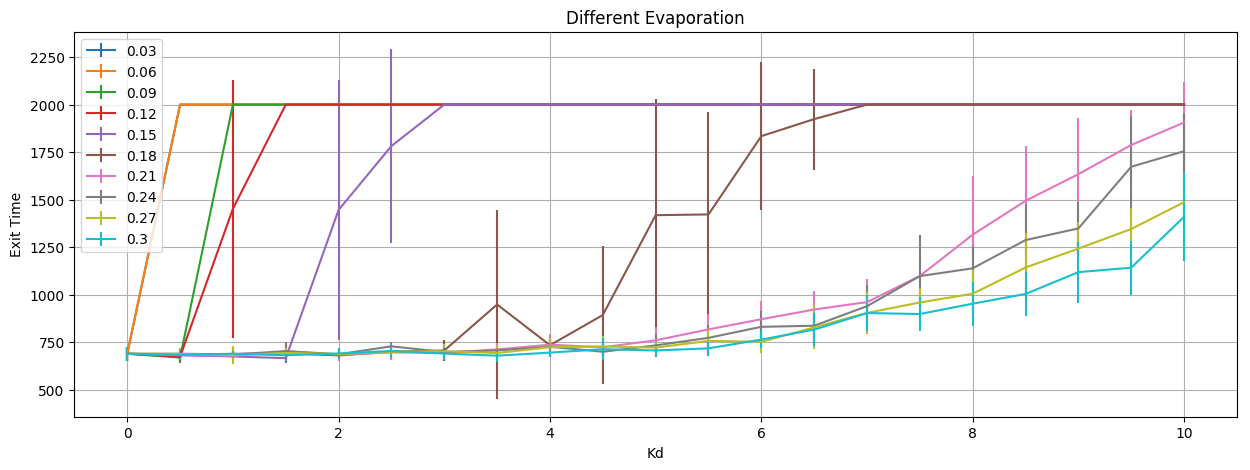

In [135]:
evapo = cycle_mean.index.levels[0]
kds = cycle_mean.index.levels[1]
kss = list(cycle_mean.index.levels[1])
plt.figure(figsize=(15,5))

for el in evapo:
  plt.errorbar(kds,cycle_mean['cycle'][el],yerr=cycle_std['cycle'][el],label=str(round(el,2)))
  
plt.grid()
plt.title('Different Evaporation')
plt.xlabel('Kd')
plt.legend()
plt.ylabel('Exit Time');

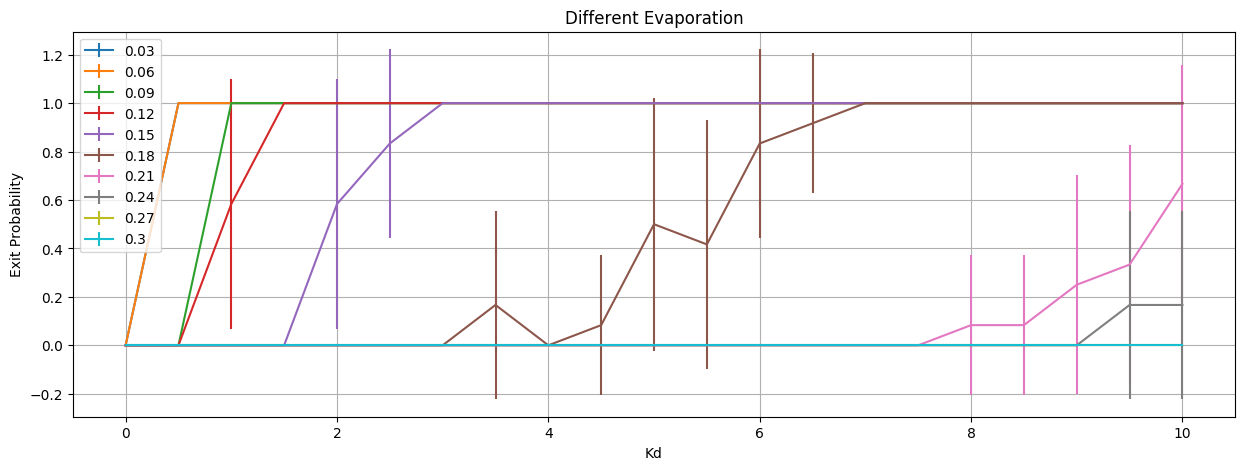

In [144]:
evapo = cycle_mean.index.levels[0]
kds = cycle_mean.index.levels[1]
kss = list(cycle_mean.index.levels[1])
plt.figure(figsize=(15,5))

for el in evapo:
  plt.errorbar(kds,cycle_mean['cap'][el],yerr=cycle_std['cap'][el],label=str(round(el,2)))
  
plt.grid()
plt.title('Different Evaporation')
plt.xlabel('Kd')
plt.legend()
plt.ylabel('Exit Probability');

In [0]:
crit=[]
for ev in evapo:
  [junk,idx]=np.unique(cycle_mean['cap'][ev],return_index=True)
  if len(idx) == 1:
    crit.append(10)
  else:
    crit.append(kds[int(idx[np.argsort(idx)==1])])

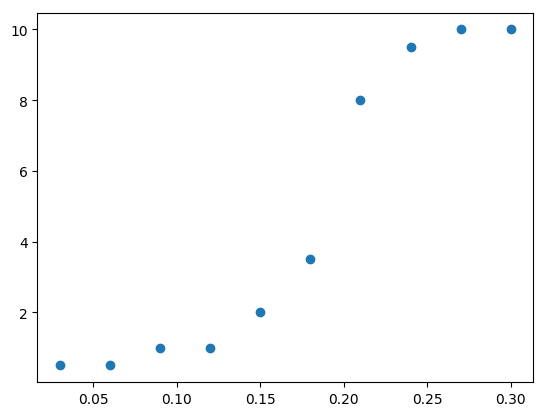

In [173]:
plt.plot(evapo,crit,'o')

[30.0419783   5.75792412  4.63924469  1.1692508 ]


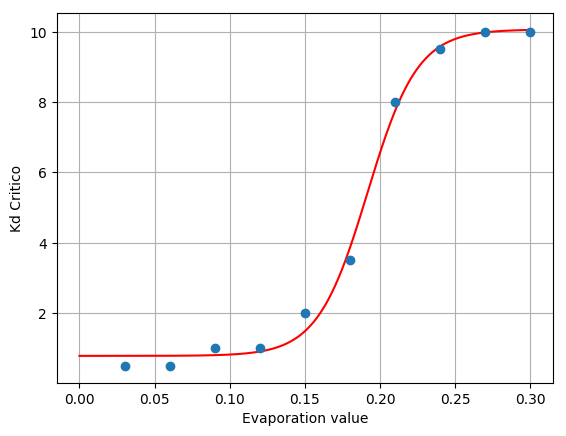

In [237]:
from scipy.optimize import curve_fit, fmin

def func(x, a, b,c,d):
     return (np.tanh(x*a-b)+d)*c

popt, pcov = curve_fit(func, lv, crit)
print(popt)
x=np.linspace(0,0.3,1000)
plt.plot(x, func(x, *popt), 'r-')
plt.plot(lv, crit,'o')
plt.ylabel('Kd Critico')
plt.xlabel('Evaporation value')
plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arctanh
  This is separate from the ipykernel package so we can avoid doing imports until


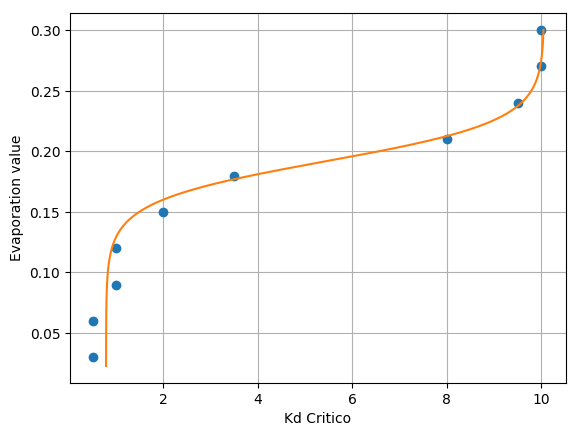

In [238]:
plt.plot(crit,evapo,'o')
x=np.linspace(0.78,10.05,10000)
plt.plot(x,(np.arctanh(x/popt[2]-popt[3])+popt[1])/popt[0])
#plot(x,((0.5*log((1+(x/5-1))/(1-(x/5-1))))+4.53803849)/(23.89136817))
plt.xlabel('Kd Critico')
plt.ylabel('Evaporation value')
plt.grid()

In [0]:
def evapo_crit(kd):
    return (arctanh(kd/5-1)+4.53803849)/23.89136817

In [0]:
evapo_crit(5)

0.18994468871390716

In [0]:
arctanh(0.1)

0.1003353477310756